In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/weather_forecast_dataset_mar_2025.csv")
df.head()

,datetime,location,temperature_C,feels_like_C,humidity_%,dew_point_C,pressure_hPa,wind_speed_kmph,wind_direction_deg,cloud_cover_%,uv_index,solar_radiation_Wm2,precipitation_mm,visibility_km,weather_condition,is_daytime,season,holiday_flag
0,2025-03-01 00:00:00,New Delhi,28.9,29.933461,70,22.9,1007.1,13.7,278,49,4,0.0,0.0,7.5,Cloudy,0,Spring,0
1,2025-03-01 01:00:00,New Delhi,27.2,28.106909,55,18.2,1015.9,13.1,229,8,4,0.0,0.0,9.6,Thunderstorm,0,Spring,0
2,2025-03-01 02:00:00,New Delhi,30.2,31.295336,69,24.0,1019.0,18.3,173,25,3,0.0,0.0,8.8,Fog,0,Spring,0
3,2025-03-01 03:00:00,New Delhi,24.4,25.846616,69,18.2,1013.6,14.1,266,38,3,0.0,0.0,8.1,Fog,0,Spring,0
4,2025-03-01 04:00:00,New Delhi,27.0,28.162382,86,24.2,1001.9,20.8,93,18,2,0.0,0.0,9.1,Sunny,0,Spring,0


In [3]:
df.shape

(3720, 18)

In [4]:
df.columns

Index(['datetime', 'location', 'temperature_C', 'feels_like_C', 'humidity_%',
       'dew_point_C', 'pressure_hPa', 'wind_speed_kmph', 'wind_direction_deg',
       'cloud_cover_%', 'uv_index', 'solar_radiation_Wm2', 'precipitation_mm',
       'visibility_km', 'weather_condition', 'is_daytime', 'season',
       'holiday_flag'],
      dtype='object')

In [5]:
# seaching for missing values
df.isnull().sum()

,0
datetime,0
location,0
temperature_C,0
feels_like_C,0
humidity_%,0
dew_point_C,0
pressure_hPa,0
wind_speed_kmph,0
wind_direction_deg,0
cloud_cover_%,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             3720 non-null   object 
 1   location             3720 non-null   object 
 2   temperature_C        3720 non-null   float64
 3   feels_like_C         3720 non-null   float64
 4   humidity_%           3720 non-null   int64  
 5   dew_point_C          3720 non-null   float64
 6   pressure_hPa         3720 non-null   float64
 7   wind_speed_kmph      3720 non-null   float64
 8   wind_direction_deg   3720 non-null   int64  
 9   cloud_cover_%        3720 non-null   int64  
 10  uv_index             3720 non-null   int64  
 11  solar_radiation_Wm2  3720 non-null   float64
 12  precipitation_mm     3720 non-null   float64
 13  visibility_km        3720 non-null   float64
 14  weather_condition    3720 non-null   object 
 15  is_daytime           3720 non-null   i

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_C,3720.0,27.968414,4.924234,10.300000,24.600000,28.000000,31.200000,45.900000
feels_like_C,3720.0,28.956085,4.942529,12.203382,25.569968,29.002672,32.183501,47.383738
humidity_%,3720.0,64.611022,14.961168,18.000000,54.000000,65.000000,75.000000,100.000000
dew_point_C,3720.0,20.890618,5.802667,2.400000,16.900000,20.900000,24.700000,39.500000
pressure_hPa,3720.0,1009.940699,5.074530,992.300000,1006.500000,1010.000000,1013.300000,1027.900000
wind_speed_kmph,3720.0,14.994274,4.966740,0.500000,11.775000,15.000000,18.400000,31.700000
wind_direction_deg,3720.0,181.875806,106.112411,0.000000,89.000000,184.000000,276.000000,360.000000
cloud_cover_%,3720.0,49.775269,28.923010,0.000000,25.000000,50.500000,74.000000,100.000000
uv_index,3720.0,5.442473,3.452427,0.000000,2.000000,5.000000,8.000000,11.000000
solar_radiation_Wm2,3720.0,273.161828,274.538507,0.000000,0.000000,288.200000,517.550000,1037.400000


In [8]:
#number of numerical columns
numerical_cols = df.select_dtypes(include=[int, float])
num_numerical_cols = len(numerical_cols.columns)
print(f"Number of numerical columns: {num_numerical_cols}")
print(f"\nNumerical columns:\n{numerical_cols.columns}")

# number of categorical columns
categorical_cols = df.select_dtypes(include='object').columns
num_categorical_cols = len(categorical_cols)
print(f"\nNumber of categorical columns: {num_categorical_cols}")
print(f"\nCategorical columns:\n{categorical_cols}")

Number of numerical columns: 14

Numerical columns:
Index(['temperature_C', 'feels_like_C', 'humidity_%', 'dew_point_C',
       'pressure_hPa', 'wind_speed_kmph', 'wind_direction_deg',
       'cloud_cover_%', 'uv_index', 'solar_radiation_Wm2', 'precipitation_mm',
       'visibility_km', 'is_daytime', 'holiday_flag'],
      dtype='object')

Number of categorical columns: 4

Categorical columns:
Index(['datetime', 'location', 'weather_condition', 'season'], dtype='object')



🔹 Plotting distribution for: temperature_C


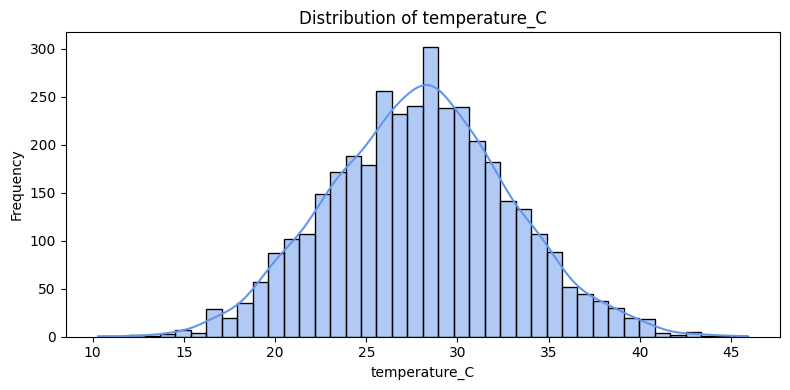


🔹 Plotting distribution for: feels_like_C


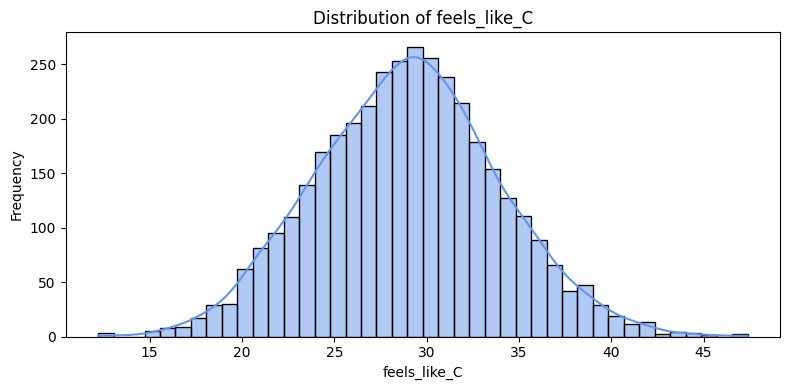


🔹 Plotting distribution for: humidity_%


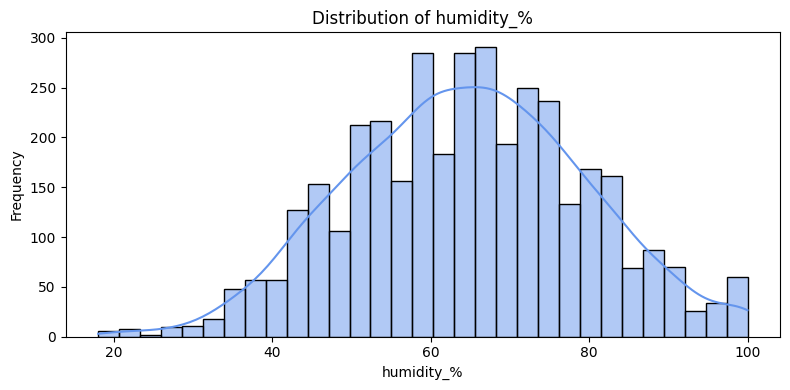


🔹 Plotting distribution for: dew_point_C


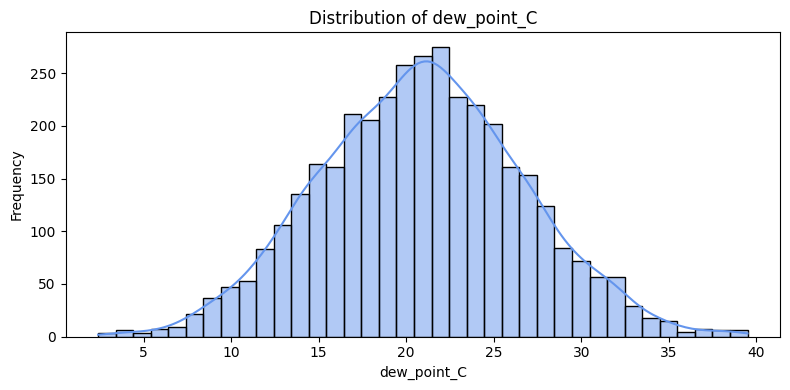


🔹 Plotting distribution for: pressure_hPa


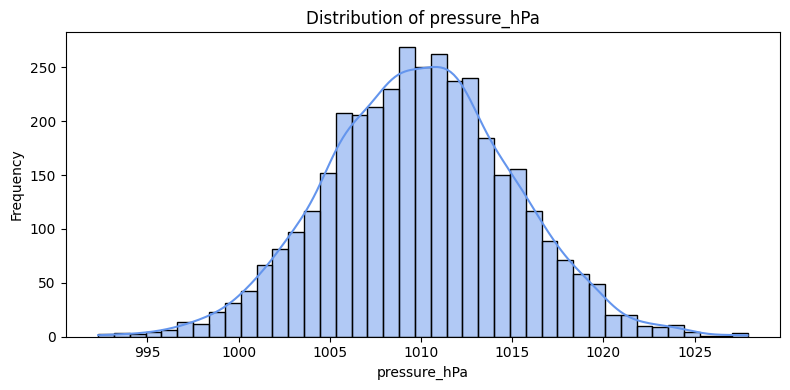


🔹 Plotting distribution for: wind_speed_kmph


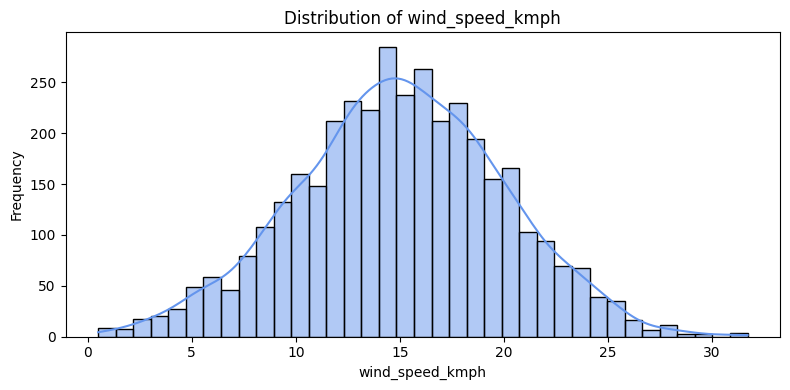


🔹 Plotting distribution for: wind_direction_deg


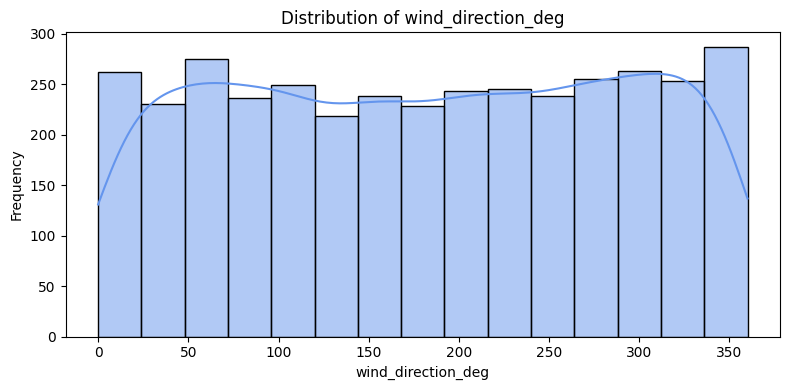


🔹 Plotting distribution for: cloud_cover_%


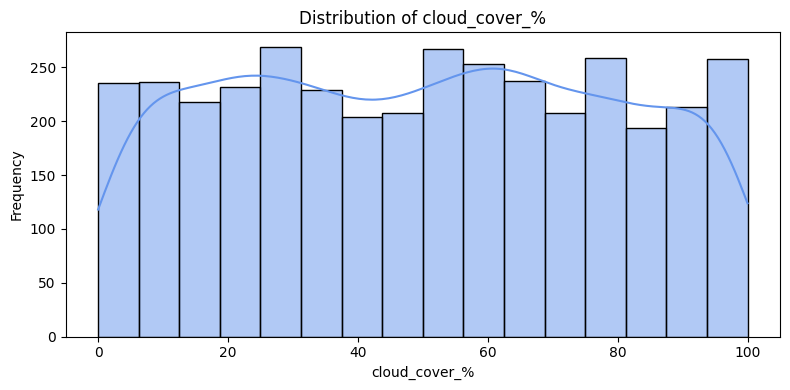


🔹 Plotting distribution for: uv_index


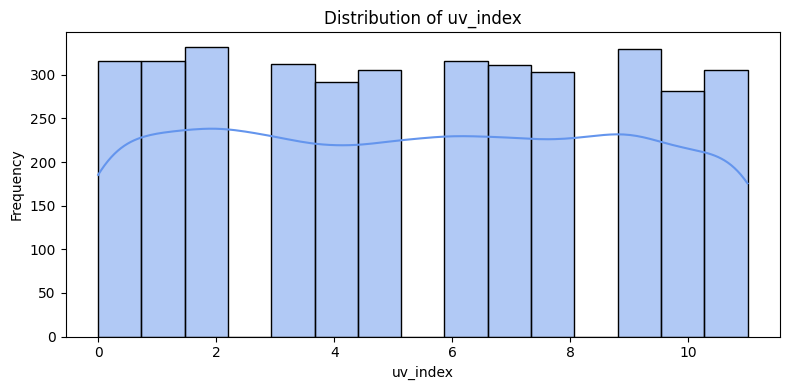


🔹 Plotting distribution for: solar_radiation_Wm2


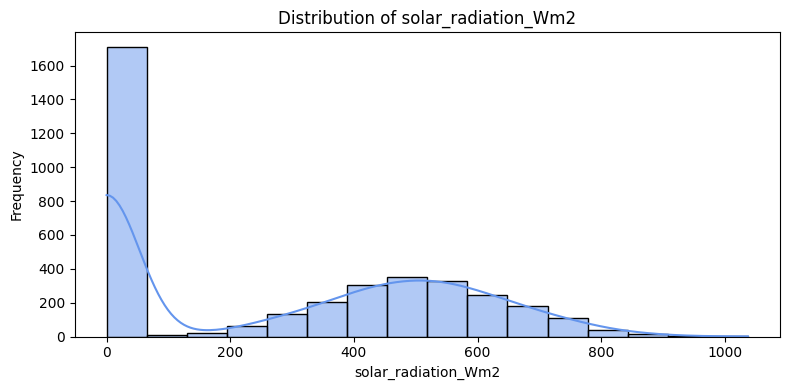


🔹 Plotting distribution for: precipitation_mm


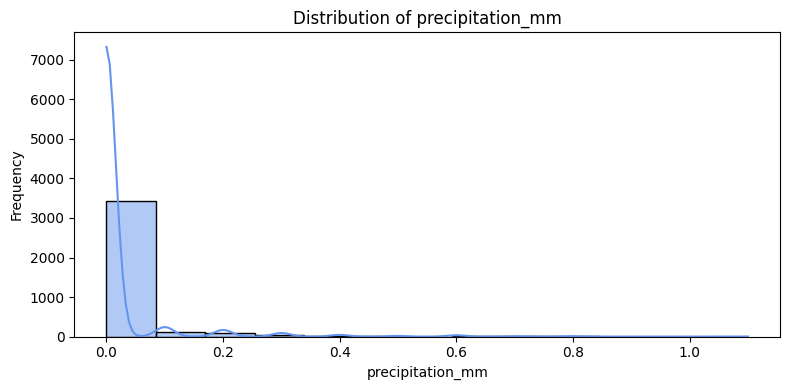


🔹 Plotting distribution for: visibility_km


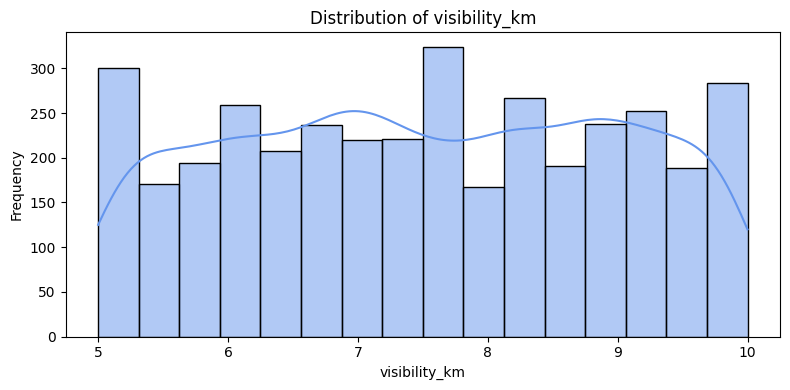


🔹 Plotting distribution for: is_daytime


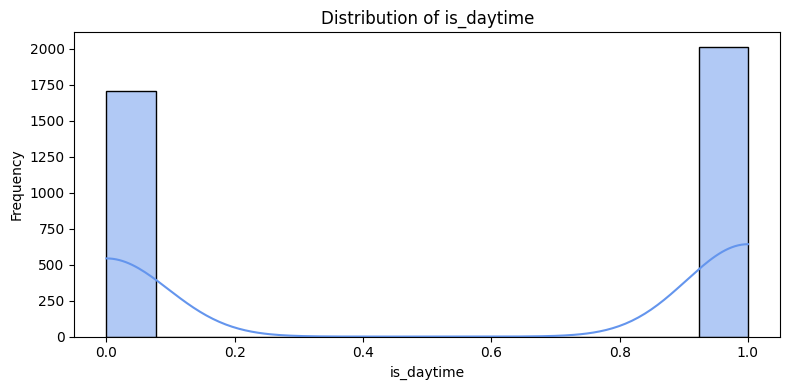


🔹 Plotting distribution for: holiday_flag


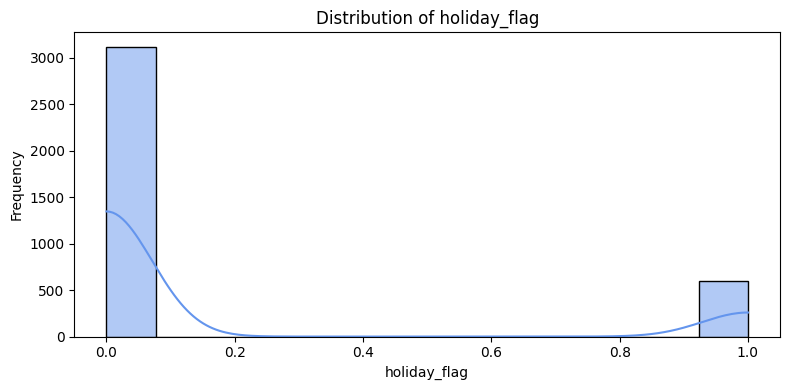

In [9]:
import plotly.express as px
for col in numerical_cols:
    print(f"\n🔹 Plotting distribution for: {col}")
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, color='cornflowerblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    fig = px.histogram(df, x=col, nbins=50, marginal='box', title=f"{col} - Interactive Histogram")
    fig.show()

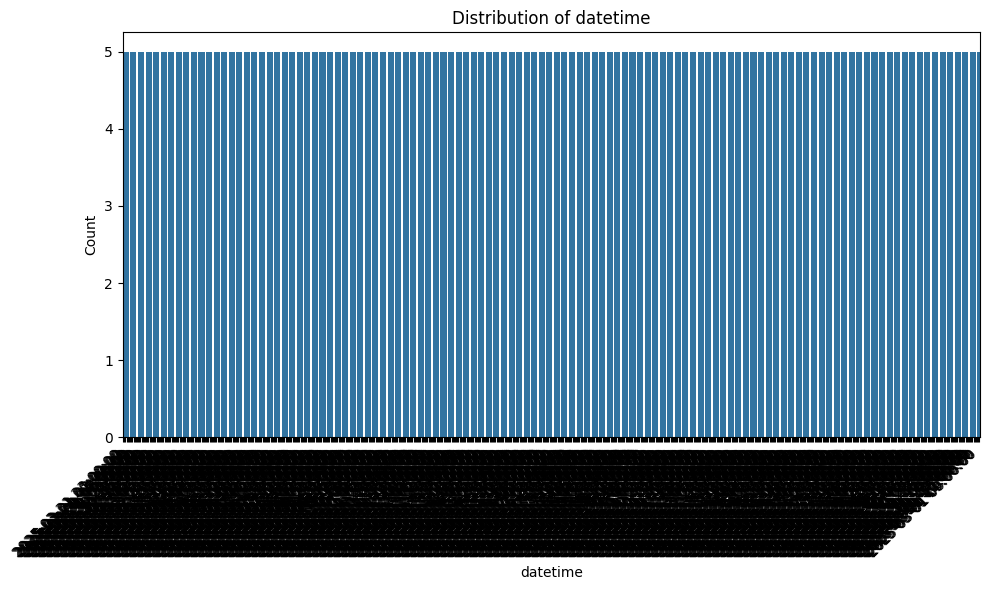

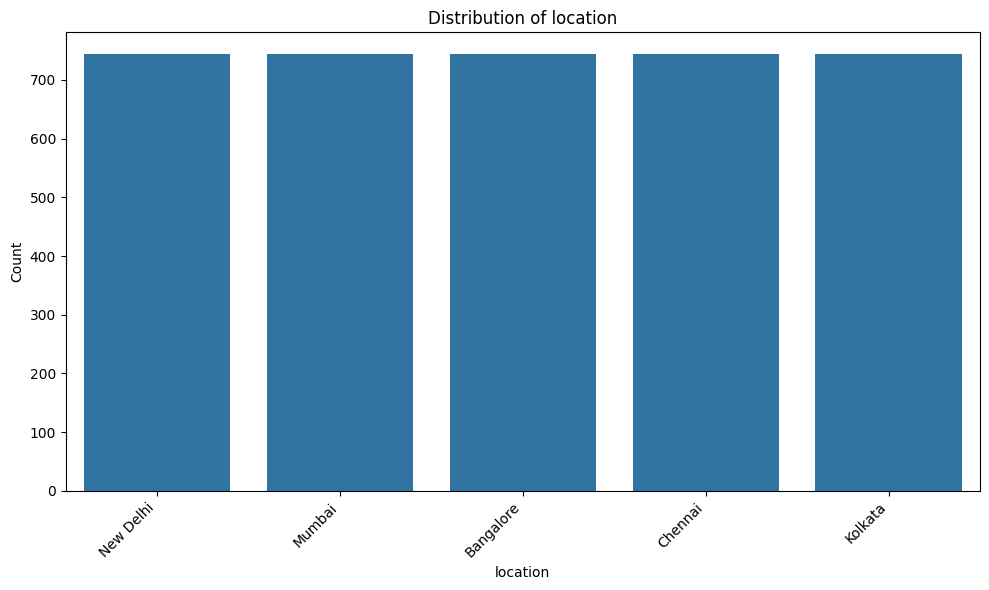

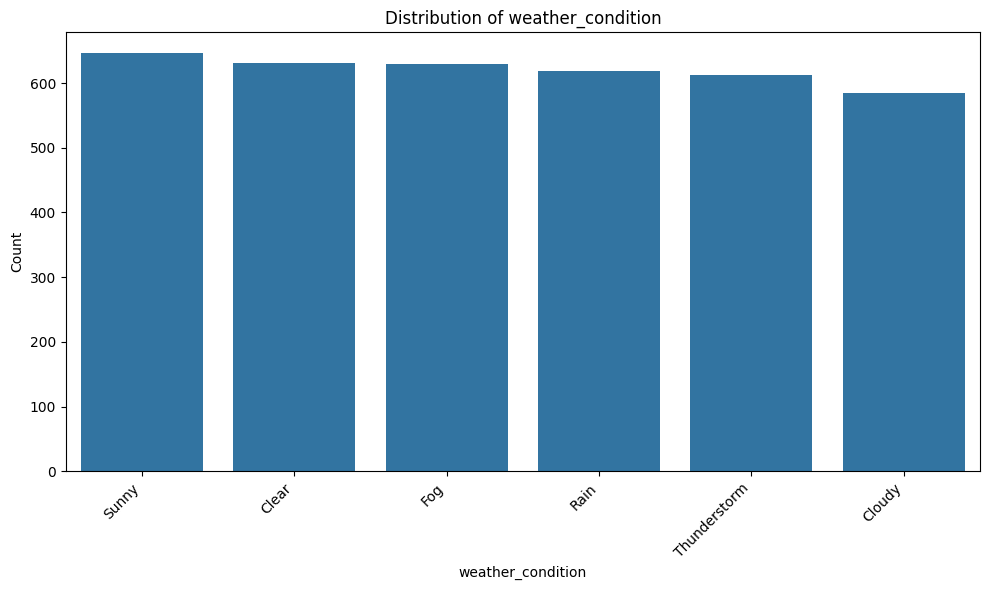

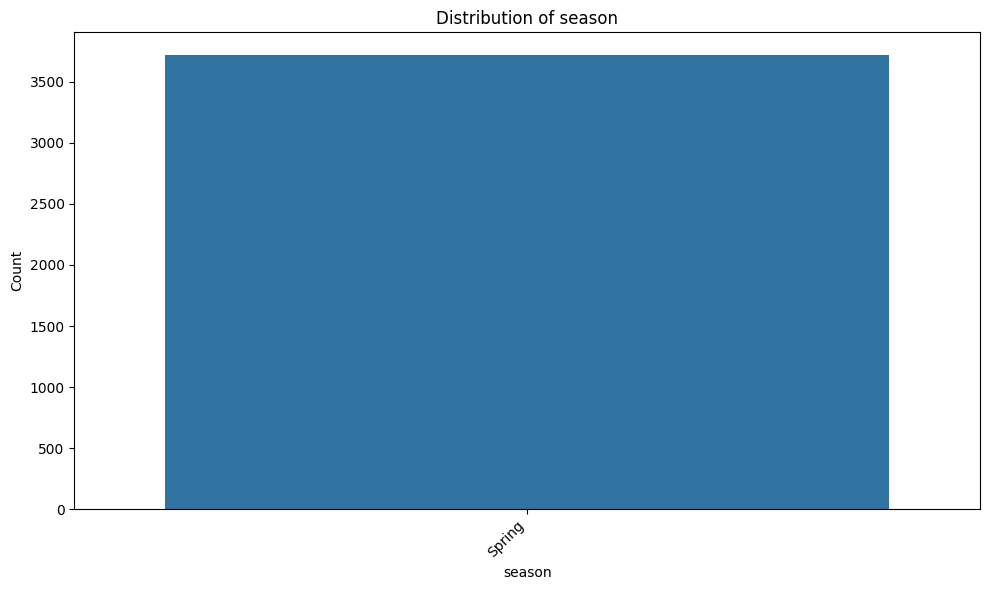

In [10]:
for column in categorical_cols:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.countplot(x=df[column], order=df[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()
    plt.show()

In [11]:
from scipy.stats import skew, kurtosis

In [12]:
for col in numerical_cols:
    col_skew = skew(df[col].dropna()) # Calculate skewness for each column
    col_kurt = kurtosis(df[col].dropna()) # Calculate kurtosis for each column
    print(f"\nColumn: {col}")
    print(f"  Skewness: {col_skew:.2f} (Ideal: 0 for normal distribution)")
    print(f"  Kurtosis: {col_kurt:.2f} (Ideal: 3 for normal distribution)")


Column: temperature_C
  Skewness: 0.06 (Ideal: 0 for normal distribution)
  Kurtosis: -0.04 (Ideal: 3 for normal distribution)

Column: feels_like_C
  Skewness: 0.06 (Ideal: 0 for normal distribution)
  Kurtosis: -0.03 (Ideal: 3 for normal distribution)

Column: humidity_%
  Skewness: -0.01 (Ideal: 0 for normal distribution)
  Kurtosis: -0.28 (Ideal: 3 for normal distribution)

Column: dew_point_C
  Skewness: 0.05 (Ideal: 0 for normal distribution)
  Kurtosis: -0.08 (Ideal: 3 for normal distribution)

Column: pressure_hPa
  Skewness: 0.01 (Ideal: 0 for normal distribution)
  Kurtosis: 0.08 (Ideal: 3 for normal distribution)

Column: wind_speed_kmph
  Skewness: -0.04 (Ideal: 0 for normal distribution)
  Kurtosis: -0.09 (Ideal: 3 for normal distribution)

Column: wind_direction_deg
  Skewness: -0.02 (Ideal: 0 for normal distribution)
  Kurtosis: -1.24 (Ideal: 3 for normal distribution)

Column: cloud_cover_%
  Skewness: 0.02 (Ideal: 0 for normal distribution)
  Kurtosis: -1.18 (Ideal: 3

In [13]:
# Add 1 to avoid log(0)
df['precipitation_mm_log'] = np.log1p(df['precipitation_mm'])

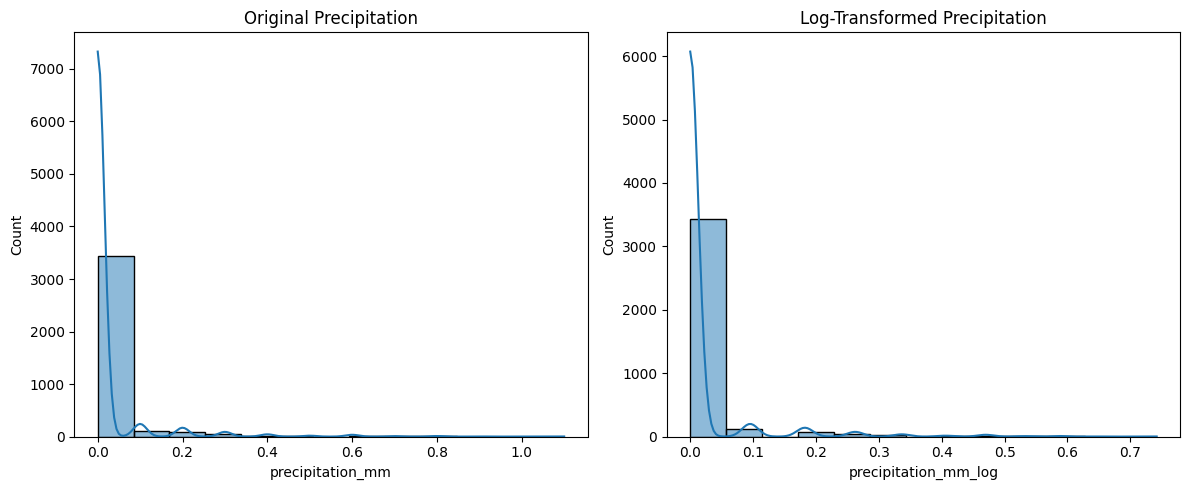

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare original and log-transformed
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['precipitation_mm'], kde=True, ax=axs[0])
axs[0].set_title("Original Precipitation")

sns.histplot(df['precipitation_mm_log'], kde=True, ax=axs[1])
axs[1].set_title("Log-Transformed Precipitation")

plt.tight_layout()
plt.show()

In [15]:
# For original data
skewness_orig = skew(df['precipitation_mm'])
kurtosis_orig = kurtosis(df['precipitation_mm'])

print(f"📊 Original 'precipitation_mm':")
print(f"   Skewness  = {skewness_orig:.2f}")
print(f"   Kurtosis  = {kurtosis_orig:.2f}")

# For log-transformed data
skewness_log = skew(df['precipitation_mm_log'])
kurtosis_log = kurtosis(df['precipitation_mm_log'])

print(f"\n📉 Log-transformed 'precipitation_mm_log':")
print(f"   Skewness  = {skewness_log:.2f}")
print(f"   Kurtosis  = {kurtosis_log:.2f}")

📊 Original 'precipitation_mm':
   Skewness  = 5.98
   Kurtosis  = 43.37

📉 Log-transformed 'precipitation_mm_log':
   Skewness  = 5.24
   Kurtosis  = 31.66


In [17]:
# Select only numerical features
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

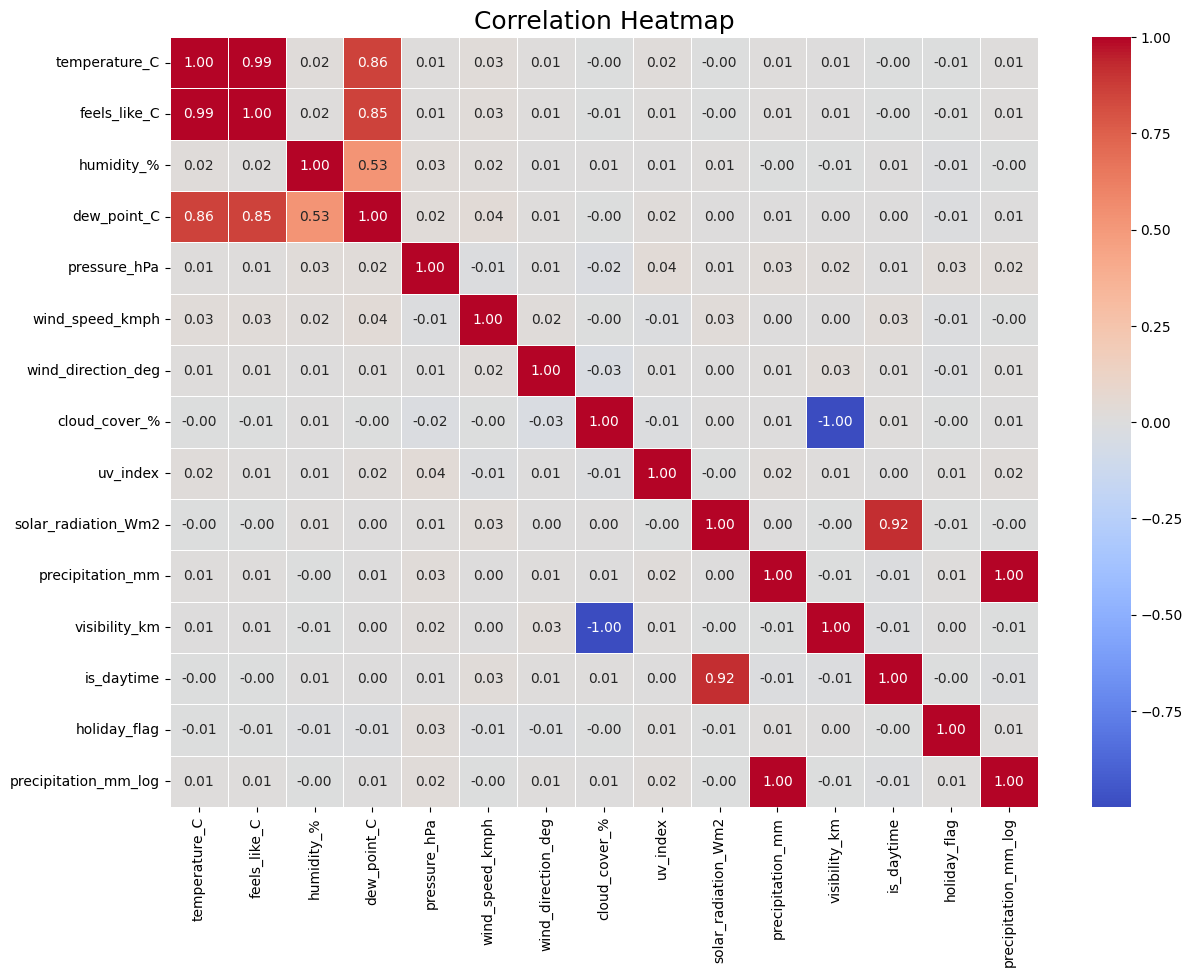

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

In [19]:
target_corr = correlation_matrix[['temperature_C', 'humidity_%', 'wind_speed_kmph']].sort_values(by='temperature_C', ascending=False)
print(target_corr)

                      temperature_C  humidity_%  wind_speed_kmph
temperature_C              1.000000    0.015928         0.029876
feels_like_C               0.994959    0.015253         0.030262
dew_point_C                0.856829    0.529182         0.035471
wind_speed_kmph            0.029876    0.019622         1.000000
uv_index                   0.017692    0.007571        -0.014677
humidity_%                 0.015928    1.000000         0.019622
pressure_hPa               0.011477    0.029220        -0.012180
precipitation_mm           0.010396   -0.002138         0.003945
precipitation_mm_log       0.010344   -0.003103        -0.000966
wind_direction_deg         0.009296    0.005893         0.019634
visibility_km              0.005047   -0.006238         0.002302
is_daytime                -0.000028    0.006052         0.026762
solar_radiation_Wm2       -0.000323    0.008600         0.029025
cloud_cover_%             -0.004947    0.006247        -0.001881
holiday_flag             

In [20]:
print("🔍 Detecting outliers in numerical columns using IQR method:\n")

# Detect outliers using IQR method
for column in numerical_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    num_outliers = len(outliers)
    print(f"📊 Column: {column} | Outliers: {num_outliers}")

print("\n📋 Checking for rare categories in categorical columns:\n")

# Checking for rare categories in categorical columns
for col in categorical_cols:
    value_counts = df[col].value_counts(normalize=True)
    rare = value_counts[value_counts < 0.01]  # less than 1% occurrence
    if not rare.empty:
        print(f"🟡 Column: {col} | Rare categories: {list(rare.index)}")
    else:
        print(f"✅ Column: {col} | No rare categories found.")

🔍 Detecting outliers in numerical columns using IQR method:

📊 Column: temperature_C | Outliers: 21
📊 Column: feels_like_C | Outliers: 23
📊 Column: humidity_% | Outliers: 8
📊 Column: dew_point_C | Outliers: 31
📊 Column: pressure_hPa | Outliers: 37
📊 Column: wind_speed_kmph | Outliers: 22
📊 Column: wind_direction_deg | Outliers: 0
📊 Column: cloud_cover_% | Outliers: 0
📊 Column: uv_index | Outliers: 0
📊 Column: solar_radiation_Wm2 | Outliers: 0
📊 Column: precipitation_mm | Outliers: 289
📊 Column: visibility_km | Outliers: 0
📊 Column: is_daytime | Outliers: 0
📊 Column: holiday_flag | Outliers: 600

📋 Checking for rare categories in categorical columns:

🟡 Column: datetime | Rare categories: ['2025-03-31 23:00:00', '2025-03-01 00:00:00', '2025-03-01 01:00:00', '2025-03-01 02:00:00', '2025-03-01 03:00:00', '2025-03-01 04:00:00', '2025-03-01 05:00:00', '2025-03-01 06:00:00', '2025-03-31 07:00:00', '2025-03-31 06:00:00', '2025-03-31 05:00:00', '2025-03-31 04:00:00', '2025-03-31 03:00:00', '20

In [21]:
# Create a copy to avoid modifying the original data
df_no_outliers = df.copy()

# Remove outliers based on IQR
for column in numerical_cols:
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter to keep only non-outliers
    df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

print(f"✅ Original shape: {df.shape}")
print(f"✅ Shape after outlier removal: {df_no_outliers.shape}")

✅ Original shape: (3720, 19)
✅ Shape after outlier removal: (2786, 19)


In [22]:
# Further remove remaining outliers in wind_speed_kmph
Q1 = df_no_outliers['wind_speed_kmph'].quantile(0.25)
Q3 = df_no_outliers['wind_speed_kmph'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove wind_speed_kmph outliers
df_no_outliers = df_no_outliers[
    (df_no_outliers['wind_speed_kmph'] >= lower_bound) &
    (df_no_outliers['wind_speed_kmph'] <= upper_bound)
]

In [23]:
# Detect outliers after removal
print("\n🔍 Detecting outliers in numerical columns after outlier removal:\n")

for column in numerical_cols:
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_no_outliers[(df_no_outliers[column] < lower_bound) | (df_no_outliers[column] > upper_bound)]
    num_outliers = len(outliers)
    print(f"📊 Column: {column} | Outliers: {num_outliers}")


🔍 Detecting outliers in numerical columns after outlier removal:

📊 Column: temperature_C | Outliers: 0
📊 Column: feels_like_C | Outliers: 0
📊 Column: humidity_% | Outliers: 0
📊 Column: dew_point_C | Outliers: 0
📊 Column: pressure_hPa | Outliers: 1
📊 Column: wind_speed_kmph | Outliers: 0
📊 Column: wind_direction_deg | Outliers: 0
📊 Column: cloud_cover_% | Outliers: 0
📊 Column: uv_index | Outliers: 0
📊 Column: solar_radiation_Wm2 | Outliers: 0
📊 Column: precipitation_mm | Outliers: 0
📊 Column: visibility_km | Outliers: 0
📊 Column: is_daytime | Outliers: 0
📊 Column: holiday_flag | Outliers: 0


In [24]:
print(categorical_cols)

Index(['datetime', 'location', 'weather_condition', 'season'], dtype='object')


In [25]:
print(df_no_outliers[['location', 'weather_condition', 'season']].isnull().sum())

location             0
weather_condition    0
season               0
dtype: int64


In [26]:
print(df_no_outliers['weather_condition'].value_counts())

weather_condition
Clear           484
Sunny           473
Rain            468
Thunderstorm    458
Fog             457
Cloudy          444
Name: count, dtype: int64


In [27]:
print(df_no_outliers['location'].value_counts())

location
New Delhi    572
Mumbai       570
Kolkata      559
Bangalore    557
Chennai      526
Name: count, dtype: int64


In [28]:
print(df_no_outliers['season'].value_counts())

season
Spring    2784
Name: count, dtype: int64


In [29]:
print(df_no_outliers['datetime'].value_counts())

datetime
2025-03-31 23:00:00    5
2025-03-31 21:00:00    5
2025-03-31 20:00:00    5
2025-03-31 19:00:00    5
2025-03-31 18:00:00    5
                      ..
2025-03-15 13:00:00    2
2025-03-04 11:00:00    2
2025-03-07 13:00:00    2
2025-03-18 19:00:00    2
2025-03-21 00:00:00    2
Name: count, Length: 624, dtype: int64


In [30]:
for col in ['location', 'weather_condition', 'season']:
    print(f"{col}:\n{df_no_outliers[col].value_counts()}\n")

location:
location
New Delhi    572
Mumbai       570
Kolkata      559
Bangalore    557
Chennai      526
Name: count, dtype: int64

weather_condition:
weather_condition
Clear           484
Sunny           473
Rain            468
Thunderstorm    458
Fog             457
Cloudy          444
Name: count, dtype: int64

season:
season
Spring    2784
Name: count, dtype: int64



In [31]:
# One-Hot Encode 'location' and 'weather_condition'
final_df = pd.get_dummies(df_no_outliers, columns=['location', 'weather_condition'], drop_first=True)

In [32]:
final_df = final_df.drop('season', axis=1)

In [33]:
print(final_df.head())

              datetime  temperature_C  feels_like_C  humidity_%  dew_point_C  \
0  2025-03-01 00:00:00           28.9     29.933461          70         22.9   
1  2025-03-01 01:00:00           27.2     28.106909          55         18.2   
2  2025-03-01 02:00:00           30.2     31.295336          69         24.0   
3  2025-03-01 03:00:00           24.4     25.846616          69         18.2   
4  2025-03-01 04:00:00           27.0     28.162382          86         24.2   

   pressure_hPa  wind_speed_kmph  wind_direction_deg  cloud_cover_%  uv_index  \
0        1007.1             13.7                 278             49         4   
1        1015.9             13.1                 229              8         4   
2        1019.0             18.3                 173             25         3   
3        1013.6             14.1                 266             38         3   
4        1001.9             20.8                  93             18         2   

   ...  precipitation_mm_log  lo

In [34]:
# Convert to datetime type
final_df['datetime'] = pd.to_datetime(final_df['datetime'])

# Extract new features
final_df['hour'] = final_df['datetime'].dt.hour
final_df['dayofweek'] = final_df['datetime'].dt.dayofweek  # Monday=0, Sunday=6
final_df['month'] = final_df['datetime'].dt.month
final_df['is_weekend'] = final_df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

In [35]:
final_df = final_df.drop(columns=['datetime'])

In [36]:
final_df.head()

,temperature_C,feels_like_C,humidity_%,dew_point_C,pressure_hPa,wind_speed_kmph,wind_direction_deg,cloud_cover_%,uv_index,solar_radiation_Wm2,...,location_New Delhi,weather_condition_Cloudy,weather_condition_Fog,weather_condition_Rain,weather_condition_Sunny,weather_condition_Thunderstorm,hour,dayofweek,month,is_weekend
0,28.9,29.933461,70,22.9,1007.1,13.7,278,49,4,0.0,...,True,True,False,False,False,False,0,5,3,1
1,27.2,28.106909,55,18.2,1015.9,13.1,229,8,4,0.0,...,True,False,False,False,False,True,1,5,3,1
2,30.2,31.295336,69,24.0,1019.0,18.3,173,25,3,0.0,...,True,False,True,False,False,False,2,5,3,1
3,24.4,25.846616,69,18.2,1013.6,14.1,266,38,3,0.0,...,True,False,True,False,False,False,3,5,3,1
4,27.0,28.162382,86,24.2,1001.9,20.8,93,18,2,0.0,...,True,False,False,False,True,False,4,5,3,1


In [37]:
final_df.columns

Index(['temperature_C', 'feels_like_C', 'humidity_%', 'dew_point_C',
       'pressure_hPa', 'wind_speed_kmph', 'wind_direction_deg',
       'cloud_cover_%', 'uv_index', 'solar_radiation_Wm2', 'precipitation_mm',
       'visibility_km', 'is_daytime', 'holiday_flag', 'precipitation_mm_log',
       'location_Chennai', 'location_Kolkata', 'location_Mumbai',
       'location_New Delhi', 'weather_condition_Cloudy',
       'weather_condition_Fog', 'weather_condition_Rain',
       'weather_condition_Sunny', 'weather_condition_Thunderstorm', 'hour',
       'dayofweek', 'month', 'is_weekend'],
      dtype='object')

In [38]:
# Convert all boolean columns to integers (True -> 1, False -> 0)
final_df = final_df.astype({col: int for col in final_df.select_dtypes(include='bool').columns})

In [39]:
print(final_df.dtypes)

temperature_C                     float64
feels_like_C                      float64
humidity_%                          int64
dew_point_C                       float64
pressure_hPa                      float64
wind_speed_kmph                   float64
wind_direction_deg                  int64
cloud_cover_%                       int64
uv_index                            int64
solar_radiation_Wm2               float64
precipitation_mm                  float64
visibility_km                     float64
is_daytime                          int64
holiday_flag                        int64
precipitation_mm_log              float64
location_Chennai                    int64
location_Kolkata                    int64
location_Mumbai                     int64
location_New Delhi                  int64
weather_condition_Cloudy            int64
weather_condition_Fog               int64
weather_condition_Rain              int64
weather_condition_Sunny             int64
weather_condition_Thunderstorm    

In [40]:
final_df.head()

,temperature_C,feels_like_C,humidity_%,dew_point_C,pressure_hPa,wind_speed_kmph,wind_direction_deg,cloud_cover_%,uv_index,solar_radiation_Wm2,...,location_New Delhi,weather_condition_Cloudy,weather_condition_Fog,weather_condition_Rain,weather_condition_Sunny,weather_condition_Thunderstorm,hour,dayofweek,month,is_weekend
0,28.9,29.933461,70,22.9,1007.1,13.7,278,49,4,0.0,...,1,1,0,0,0,0,0,5,3,1
1,27.2,28.106909,55,18.2,1015.9,13.1,229,8,4,0.0,...,1,0,0,0,0,1,1,5,3,1
2,30.2,31.295336,69,24.0,1019.0,18.3,173,25,3,0.0,...,1,0,1,0,0,0,2,5,3,1
3,24.4,25.846616,69,18.2,1013.6,14.1,266,38,3,0.0,...,1,0,1,0,0,0,3,5,3,1
4,27.0,28.162382,86,24.2,1001.9,20.8,93,18,2,0.0,...,1,0,0,0,1,0,4,5,3,1


In [41]:
from sklearn.model_selection import train_test_split

X = final_df.drop(columns=['temperature_C', 'humidity_%', 'wind_speed_kmph'])
y = final_df[['temperature_C', 'humidity_%', 'wind_speed_kmph']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [43]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

model = MultiOutputRegressor(GradientBoostingRegressor())
model.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = model.predict(X_test_scaled)

# Inverse scale the predictions
y_pred = y_scaler.inverse_transform(y_pred_scaled)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

for i, col in enumerate(y.columns):
    print(f"--- {col} ---")
    # Calculate MSE and then take the square root for RMSE
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)
    print("R² Score:", r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()

--- temperature_C ---
RMSE: 0.5081485016312877
R² Score: 0.9879989760970667

--- humidity_% ---
RMSE: 3.1071873151114544
R² Score: 0.9545259456628717

--- wind_speed_kmph ---
RMSE: 4.981946636914703
R² Score: -0.061787605805808665



In [53]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(force_row_wise=True, random_state=42)
}

# Fit and evaluate each model
for name, base_model in models.items():
    model = MultiOutputRegressor(base_model)
    model.fit(X_train_scaled, y_train_scaled)

    # Predict and inverse scale the predictions
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = y_scaler.inverse_transform(y_pred_scaled)

    print(f"--- {name} ---")
    for i, col in enumerate(y.columns):
        rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
        r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
        print(f"📊 Target: {col}")
        print(f"   📉 RMSE: {rmse:.4f}")
        print(f"   📈 R² Score: {r2:.4f}")
    print()

--- Random Forest ---
📊 Target: temperature_C
   📉 RMSE: 0.5115
   📈 R² Score: 0.9878
📊 Target: humidity_%
   📉 RMSE: 3.0670
   📈 R² Score: 0.9557
📊 Target: wind_speed_kmph
   📉 RMSE: 4.9842
   📈 R² Score: -0.0627

--- Gradient Boosting ---
📊 Target: temperature_C
   📉 RMSE: 0.5081
   📈 R² Score: 0.9880
📊 Target: humidity_%
   📉 RMSE: 3.1065
   📈 R² Score: 0.9545
📊 Target: wind_speed_kmph
   📉 RMSE: 4.9825
   📈 R² Score: -0.0620

--- XGBoost ---
📊 Target: temperature_C
   📉 RMSE: 0.5569
   📈 R² Score: 0.9856
📊 Target: humidity_%
   📉 RMSE: 3.1701
   📈 R² Score: 0.9527
📊 Target: wind_speed_kmph
   📉 RMSE: 5.4955
   📈 R² Score: -0.2920

[LightGBM] [Info] Total Bins 1428
[LightGBM] [Info] Number of data points in the train set: 2227, number of used features: 21
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Total Bins 1428
[LightGBM] [Info] Number of data points in the train set: 2227, number of used features: 21
[LightGBM] [Info] Start training from score -0.0000

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Total Bins 1428
[LightGBM] [Info] Number of data points in the train set: 2227, number of used features: 21
[LightGBM] [Info] Start training from score -0.000000
--- LightGBM ---
📊 Target: temperature_C
   📉 RMSE: 0.5367
   📈 R² Score: 0.9866
📊 Target: humidity_%
   📉 RMSE: 3.0074
   📈 R² Score: 0.9574
📊 Target: wind_speed_kmph
   📉 RMSE: 5.1608
   📈 R² Score: -0.1394



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



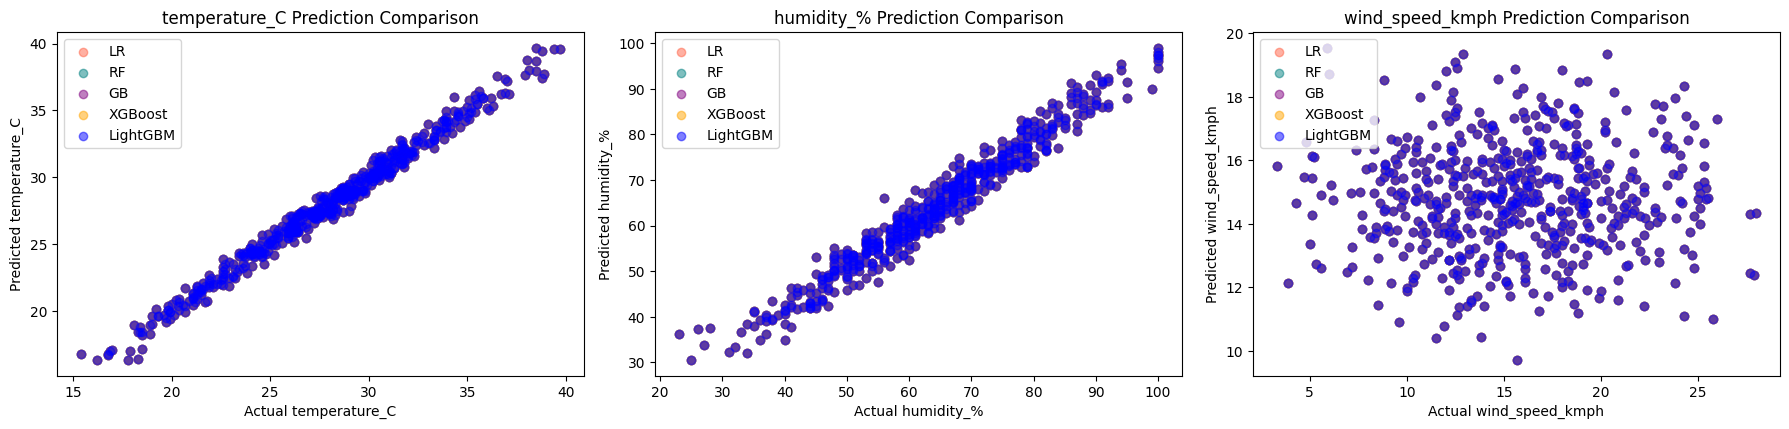

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined and trained the models using MultiOutputRegressor
# You should have the predictions `y_pred_lr`, `y_pred_rf`, `y_pred_gb`, `y_pred_xgb`, `y_pred_lgbm`

# Create a figure for plotting
plt.figure(figsize=(18, 12))

# Loop through each weather parameter (temperature, humidity, wind speed)
for i, col in enumerate(y.columns):
    plt.subplot(3, 3, i + 1)

    # Scatter plot for actual vs predicted values for each model
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.5, color='tomato', label='LR')
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.5, color='teal', label='RF')
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.5, color='purple', label='GB')
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.5, color='orange', label='XGBoost')
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.5, color='blue', label='LightGBM')

    # Set the labels and title
    plt.xlabel(f"Actual {col}")
    plt.ylabel(f"Predicted {col}")
    plt.title(f"{col} Prediction Comparison")
    plt.legend()

plt.tight_layout()
plt.show()

In [62]:
import os
import joblib

# ✅ Ensure the model save directory exists
os.makedirs("saved_models", exist_ok=True)

trained_models = {}
best_model = None
best_model_name = ""
best_model_r2 = -np.inf

# Train and evaluate models
for name, base_model in models.items():
    print(f"🔧 Training: {name}")
    model = MultiOutputRegressor(base_model)
    model.fit(X_train_scaled, y_train_scaled)
    trained_models[name] = model

    # Predict and inverse transform
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = y_scaler.inverse_transform(y_pred_scaled)

    # Evaluate R² per target and average
    r2_scores = [r2_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(len(y.columns))]
    avg_r2 = np.mean(r2_scores)

    print(f"📈 Average R² for {name}: {avg_r2:.4f}")
    if avg_r2 > best_model_r2:
        best_model_r2 = avg_r2
        best_model = model
        best_model_name = name

    # ✅ Save current model
    model_path = f"saved_models/{name.lower().replace(' ', '_')}_model.pkl"
    joblib.dump(model, model_path)

# ✅ Save best model separately
joblib.dump(best_model, "saved_models/best_model.pkl")
print(f"\n🏆 Best Model: {best_model_name} (Avg R²: {best_model_r2:.4f})")
print("✅ Best model saved to: saved_models/best_model.pkl")

🔧 Training: Random Forest
📈 Average R² for Random Forest: 0.6269
🔧 Training: Gradient Boosting
📈 Average R² for Gradient Boosting: 0.6268
🔧 Training: XGBoost
📈 Average R² for XGBoost: 0.5488
🔧 Training: LightGBM
[LightGBM] [Info] Total Bins 1428
[LightGBM] [Info] Number of data points in the train set: 2227, number of used features: 21
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Total Bins 1428
[LightGBM] [Info] Number of data points in the train set: 2227, number of used features: 21
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

[LightGBM] [Info] Total Bins 1428
[LightGBM] [Info] Number of data points in the train set: 2227, number of used features: 21
[LightGBM] [Info] Start training from score -0.000000
📈 Average R² for LightGBM: 0.6015

🏆 Best Model: Random Forest (Avg R²: 0.6269)
✅ Best model saved to: saved_models/best_model.pkl


In [72]:
import os
import joblib
import numpy as np
import pandas as pd
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Preprocessing (assumes these already exist in your session) ===
# - df
# - X_train_scaled, y_train_scaled
# - X_test_scaled, y_test
# - X_scaler, y_scaler
# - y (original target column names)

# ✅ Ensure model save directory exists
os.makedirs("saved_models", exist_ok=True)

# ✅ Save the scalers (only once)
joblib.dump(y_scaler, "saved_models/X_scaler.pkl")
joblib.dump(y_scaler, "saved_models/y_scaler.pkl")
print("✅ Scalers saved successfully.")

✅ Scalers saved successfully.
